# Who is better for the stock market: Democrats or Republicans?
## Comparative study


One of my colleagues is CFA. He knows a lot about investing. He said that if Biden wins the elections, he will sell all his stocks. He favors republican tax over democratic: "Trump's tax cut was very beneficial for stocks. If Biden increases taxes, we will see a market collapse".
As a data scientist, I believe in evidence from data and models. So I decided to figure out who are actually better for the stock market: Democrats or Republicans.

In [3]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

%matplotlib inline

First, I checked whether Trump was really good for the stock market. I downloaded `^GSPC` (a ticker for `S&P500 Index`) from https://finance.yahoo.com/ and calculated Sharpe Ratio (Risk adjusted return) and Sortino Ratio (Downside risk adjusted return) from the Obama and Trump presidentship.
I used zero risk-free rate for simplicity. This assumption is actually in favor of Trump, as [`FED Fund rates` were lower for Obama terms]
(https://tradingeconomics.com/united-states/interest-rate).  

In [219]:
sp = yf.download(tickers = '^GSPC', period='max', auto_adjust = True)['Close']

[*********************100%***********************]  1 of 1 completed


In [335]:
#print('Start date:', sp.index[0])
print('End date:', sp.index[-1])      

End date: 2020-10-01 00:00:00


In [398]:
obama = sp['2009-01-20':'2017-01-19'].pct_change(1)
trump = sp['2017-01-20':].pct_change(1)
ret = sp['2009-01-20':].pct_change(1)
# print('Daily return:')
# print('Obama mean, std, std downside:',obama.mean(), obama.std(), obama[obama < 0].std())
# print('Trump mean, std, std downside:',trump.mean(), trump.std(), trump[trump < 0].std())
# print('S&P500 mean, std, std downside:',ret.mean(), ret.std(), ret[ret < 0].std())
#print('\n')
print('Sharpe Obama:', np.round(obama.mean()/obama.std()*252**0.5, 2))
print('Sharpe Trump:', np.round(trump.mean()/trump.std()*252**0.5, 2))
#print('Sharpe S&P500:', np.round(ret.mean()/ret.std()*252**0.5, 2))
#print('\n')
print('Sortino Obama:', np.round(obama.mean()/obama[obama < 0].std()*252**0.5, 2))
print('Sortino Trump:', np.round(trump.mean()/trump[trump < 0].std()*252**0.5, 2))
print('Obama to Trump Sharpe outperformance:', np.round(obama.mean()/obama.std() / (trump.mean()/trump.std()) - 1, 2))
print('Obama to Trump Sortino outperformance:', np.round(obama.mean()/obama[obama < 0].std() / (trump.mean()/trump[trump < 0].std()) - 1, 2))

Sharpe Obama: 0.84
Sharpe Trump: 0.62
Sortino Obama: 1.1
Sortino Trump: 0.67
Obama to Trump Sharpe outperformance: 0.35
Obama to Trump Sortino outperformance: 0.66


**Obama was actually 35% better, than Trump, in terms of Shape ratio, and 66% better by Sortino**.   

When I showed these numbers to my colleague, his counter-argument was: "Trump is dealing with a pandemic with far worse return".   
    
Well, Trump was not dealing with pandemic. He ignored it.

### Dealing with pandemic, the USA vs South Korea.
The first Covid case in the USA and South Korea was caught at the same date. Korea reacted immediately. Trump said there were no worries of a pandemic. 
Decision making in South Korea has been a collaboration between the government and the scientific community. Trump did not listen to scientists. 
The day the stock market plummeted, Trump said the virus was under control in the U.S., and the stock market was looking pretty good to him.  

Korea flattened the epidemic curve quickly without closing businesses, issuing stay-at-home orders, 
or implementing many of the stricter measures adopted by other high-income countries. The US got a recession.  
https://ourworldindata.org/covid-exemplar-south-korea

Since then, Korea has lost 388 people, and the US lost 206263 (09/23/2020), that is **532 times more deaths** in the US.   
Well, Korean population is 6.44 times less than American. So it is still **82.5 times more deaths per capita** in the US. 
Moreover, Korea has 15.2 times higher population density, than the US. it is the 2nd in the World. By population density, the US get **8084 times more deaths** than Korea.   
The price of ignorance is high.
#### Update
Trump tested positive for COVID-19.

### Stock market relative performance for Obama and Trump
Compare relative performance of `S&P500` for Obama and Trump, in terms of days of their presidentship.

In [400]:
sp_norm = pd.DataFrame({'Obama': sp['2009-01-20':'2017-01-19'].reset_index(drop=True), 'Trump':sp['2017-01-20':].reset_index(drop=True)})
sp_norm = sp_norm / sp_norm.iloc[0,:]

In [401]:
sp_norm.loc[sp_norm['Trump'] == sp_norm.loc[:800, 'Trump'].max()]

,Obama,Trump
774,1.677181,1.490836


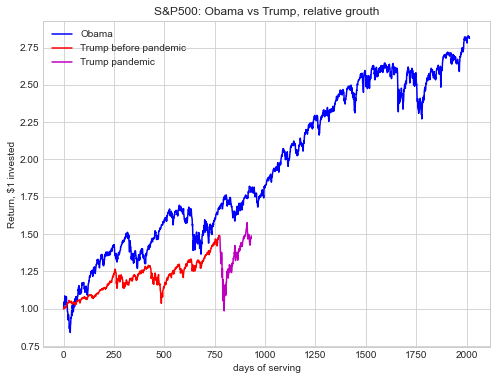

In [403]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8, 6))
plt.xlabel('days of serving')
plt.ylabel('Return, $1 invested')
plt.title('S&P500: Obama vs Trump, relative grouth')
plt.plot(sp_norm['Obama'], 'b', label='Obama')
plt.plot(sp_norm['Trump'][:775], 'r', label='Trump before pandemic')
plt.plot(sp_norm['Trump'][775:], 'm', label='Trump pandemic')
plt.legend()

In [404]:
print('Obama\'s S&P500 outperformance at the Trump\'s market top right before the pandemic:', np.round(sp_norm.loc[774, 'Obama'] / sp_norm.loc[774, 'Trump'] - 1., 2))

Obama's S&P500 outperformance at the Trump's market top right before the pandemic: 0.12


The evidence is, on 774 day of both presidentships, at the Trump's market top right before the pandemic, **Obama's market performed 12% better, in spite of Trump's tax cut**.

###  Stocks and Cash Party Timing Strategy
Trump is an outlier. He called himself "The best president in history", and many others call him "The worst president in history". Let's see the full picture.   
I checked how all presidents performed in the history of the S&P500 index since 1928, depending on their party.   

For the portfolio of the stocks (`S&P500`) and cash, I backtested two investment strategies:
1. Republicans portfolio: Long stocks on Republican presidents, cash on Democrat presidents.
2. Democrats portfolio: Long stocks on Democrat presidents, cash on Republican presidents.

I loaded [US presidents with years after inauguration and parties](https://www.theguardian.com/news/datablog/2012/oct/15/us-presidents-listed)

In [405]:
us_presidents = pd.read_csv('US presidents listed - ALL NAMES.csv')
us_presidents.index = pd.to_datetime(us_presidents['Years (after inauguration)'], format='%Y')
us_presidents = us_presidents.drop(columns=['Years (after inauguration)', 'President'])
us_presidents.index.name = None

In [20]:
us_presidents.tail(6)

,Party
2008-01-01,Republican
2009-01-01,Democrat
2010-01-01,Democrat
2011-01-01,Democrat
2012-01-01,Democrat
2013-01-01,Democrat


In [21]:
us_presidents2 = pd.DataFrame({'Party': ['Democrat']*3 + ['Republican']*4 })#, index= pd.to_datetime('2014-01-01', '2020-01-01', format='%Y'))
us_presidents2.index = pd.to_datetime(pd.Series(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01']), format='%Y-%m-%d')
parties = pd.concat([us_presidents, us_presidents2], axis=0)
parties.tail()

,Party
2014-01-01,Democrat
2015-01-01,Democrat
2016-01-01,Democrat
2017-01-01,Republican
2018-01-01,Republican
2019-01-01,Republican
2020-01-01,Republican


At the start of the year `t`, we calculated forward yearly return `S&P500[t+1]/S&P500[t] - 1` and either got long or flat, according to the party we bet on.

In [408]:
sp_y_ret = sp.asfreq('AS', how='start', method='ffill').pct_change(1).shift(-1).rename('ret')
sp_y_ret.tail()

Date
2016-01-01    0.095350
2017-01-01    0.194200
2018-01-01   -0.062373
2019-01-01    0.288781
2020-01-01         NaN
Freq: AS-JAN, Name: ret, dtype: float64

There is no yearly return for 2020 yet, so I caculated 3-quarter return for 2020:

In [420]:
sp_y_ret['2020-01-01'] = sp['2020-09-01']/sp['2020-01-02'] - 1

In [421]:
party_sp = pd.concat([parties, sp_y_ret], axis=1).dropna()

In [422]:
party_sp.head()

,Party,ret
1928-01-01,Republican,0.378822
1929-01-01,Republican,-0.119096
1930-01-01,Republican,-0.284849
1931-01-01,Republican,-0.470665
1932-01-01,Republican,-0.147783


In [423]:
party_sp.tail(12)

,Party,ret
2009-01-01,Democrat,0.234542
2010-01-01,Democrat,0.127827
2011-01-01,Democrat,-0.000032
2012-01-01,Democrat,0.134057
2013-01-01,Democrat,0.296012
2014-01-01,Democrat,0.113906
2015-01-01,Democrat,-0.007266
2016-01-01,Democrat,0.095350
2017-01-01,Republican,0.194200
2018-01-01,Republican,-0.062373


In [424]:
def portf(df, party, ret):
    portf = []
    for i in df.index:
        if df.loc[i, 'Party'] == party:
            portf.append(df.loc[i, ret]) 
        else:
            portf.append(0.)
    return portf

In [425]:
party_sp['rep_ret'] = portf(party_sp, 'Republican', 'ret')
party_sp['dem_ret'] = portf(party_sp, 'Democrat', 'ret')

In [427]:
print('Democrats mean yearly return:', np.round(party_sp['dem_ret'].mean(), 2)) #party_sp['dem_ret'].std(), party_sp.loc[party_sp['dem_ret'] < 0, 'dem_ret'].std())
print('Republicans: mean yearly return:', np.round(party_sp['rep_ret'].mean(), 2)) #party_sp['rep_ret'].std(), party_sp.loc[party_sp['rep_ret'] < 0, 'rep_ret'].std())
# #print('\n')
print('Sharpe Democrats:', np.round(party_sp['dem_ret'].mean()/party_sp['dem_ret'].std(), 2))
print('Sharpe Republicans:', np.round(party_sp['rep_ret'].mean()/party_sp['rep_ret'].std(), 2))
#print('\n')
print('Sortino Democrats:', np.round(party_sp['dem_ret'].mean()/party_sp.loc[party_sp['dem_ret'] < 0, 'dem_ret'].std(), 2))
print('Sortino Republicans:', np.round(party_sp['rep_ret'].mean()/party_sp.loc[party_sp['rep_ret'] < 0, 'rep_ret'].std(), 2))

Democrats mean yearly return: 0.05
Republicans: mean yearly return: 0.02
Sharpe Democrats: 0.41
Sharpe Republicans: 0.16
Sortino Democrats: 0.54
Sortino Republicans: 0.18


Historically, Democrats drive `S&P500` better than Republicans both in terms of higher return and lower risk. **Sortino for Democrats is 3 times higher**. 
This advantage transforms into equity:

In [428]:
party_sp['rep_portf'] = (1. + party_sp['rep_ret']).cumprod()
party_sp['dem_portf'] = (1. + party_sp['dem_ret']).cumprod()
party_sp['S&P500'] = (1. + party_sp['ret']).cumprod()

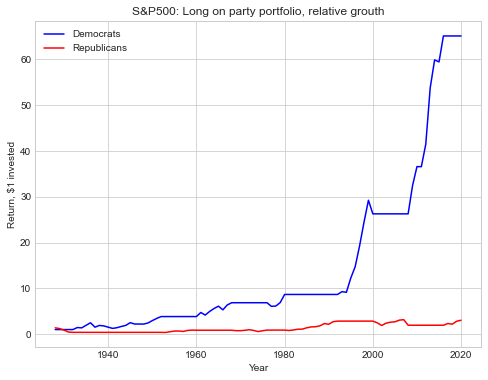

In [429]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Return, $1 invested')
plt.title('S&P500: Long on party portfolio, relative grouth')
plt.plot(party_sp['dem_portf'], 'b', label='Democrats')
plt.plot(party_sp['rep_portf'], 'r', label='Republicans')
#plt.plot(party_sp['S&P500'], 'g', label='S&P500')
plt.legend()

In [432]:
party_sp[['rep_portf', 'dem_portf']].tail(1)

,rep_portf,dem_portf
2020-01-01,3.041294,65.116278


In [434]:
print('Stocks-cash Democrats/Republicans outperformance:', np.round((party_sp.loc[:, 'dem_portf'] /  party_sp.loc[:, 'rep_portf'])[-1], 2))

Stocks-cash Democrats/Republicans outperformance: 21.41


Starting from 1928, investing in Republicans and keep cash for Democrats would turn 1 dollar to 3.04.     
In turn, investing in Democrats and keep cash for Republicans would turn 1 dollar to 65.11, that is **21.4 times better**.

### Reaganomics Stocks and Cash Party Timing strategy
One could argue that starting 1928 was not favorable for Republicans. Indeed, it was just before the Great Depression. Asymmetry in upside and downside returns did a bad thing for the Republican portfolio.
Asymmetric returns mean that after 25% drawdown, one needs 50% return just to get breakeven. After 50% drawdown, one needs 100% return to get breakeven. 
That’s why estimating strategies in terms of risk-adjusted return is very important. 
100% return with 50% drawdown is worse than 50% return with 10% drawdown. Having low downside risk, you can use leverage. For example, with 2x leverage, you’ll have the same 100% return with the 20% drawdown, and your account will recover much faster.

In [435]:
party_sp[(party_sp['rep_portf'] > 1) & (party_sp.index > '1930-01-01')].index[1]

Timestamp('1984-01-01 00:00:00')

The Republican porfolio went out from the drowdown in 1984 only.  
Lets start from 1981 Reagonomics.

In [437]:
party_sp_81 = party_sp.copy()['1981-01-01':]
party_sp_81[['rep_portf', 'dem_portf', 'S&P500']] = (1. + party_sp_81[['rep_ret', 'dem_ret', 'ret']]).cumprod()
party_sp_81[['rep_portf', 'dem_portf']].tail(1)

,rep_portf,dem_portf
2020-01-01,3.429929,7.510722


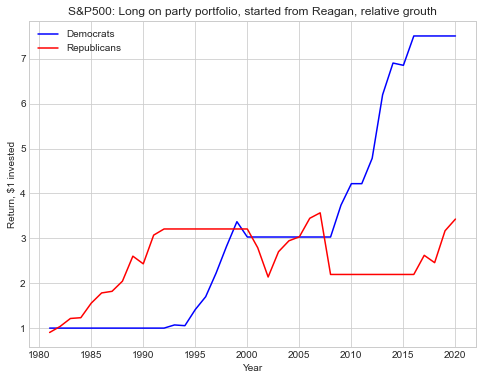

In [439]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Return, $1 invested')
plt.title('S&P500: Long on party portfolio, started from Reagan, relative grouth')
plt.plot(party_sp_81['dem_portf'], 'b', label='Democrats')
plt.plot(party_sp_81['rep_portf'], 'r', label='Republicans')
#plt.plot(party_sp_81['S&P500'], 'g', label='S&P500')
plt.legend()

In [438]:
print('Stocks/cash Reagonomics Democrats outperformance:', np.round((party_sp_81.loc[:, 'dem_portf'] /  party_sp_81.loc[:, 'rep_portf'])[-1], 2))

Stocks/cash Reagonomics Democrats outperformance: 2.19


Starting from favorable for Republicans 1981, investing in Republicans and keeping cash for Democrats would turn 1 dollar to 3.43. 
In turn, investing in Democrats and keeping cash for Republicans would turn 1 dollar to 7.51.
**Reaganomics Democratic portfolio is still 2.19 times better**.

### Treasury Bonds and Cash Party Timing Strategy
For the portfolio of T-Bonds yield, I backtested the following investment strategies:
* Republican portfolio: Long T-Bonds on Republican presidents, cash on Democratic presidents.
* Democratic portfolio: Long T-Bonds Democratic presidents, cash on Republican presidents.   

I downloaded Treasury Bonds yield `^TYNX` historical data (available from 1978), sampled it yearly and divided by 100, as it is quoted in percents.

In [444]:
#Treasury Yield 30 Years (^TYNX)
tb = yf.download(tickers = '^TYX', period='max', auto_adjust = True)['Close']/100
tb_y = tb.asfreq('AS', how='start', method='ffill').shift(-1).rename('tb')
tb_y['2020-01-01'] = tb['2020-09-01']/100
party_sp_tb = pd.concat([parties, sp_y, tb_y], axis=1).dropna()#['1981-01-01':]

[*********************100%***********************]  1 of 1 completed


In [454]:
tb.tail()

Date
2020-09-28    0.01423
2020-09-29    0.01406
2020-09-30    0.01451
2020-10-01    0.01454
2020-10-02    0.01481
Name: Close, dtype: float64

In [445]:
party_sp_tb['rep_tb'] = portf(party_sp_tb, 'Republican', 'tb')
party_sp_tb['dem_tb'] = portf(party_sp_tb, 'Democrat', 'tb')
party_sp_tb['rep_tb_portf'] = (1. + party_sp_tb['rep_tb']).cumprod()
party_sp_tb['dem_tb_portf'] = (1. + party_sp_tb['dem_tb']).cumprod()
party_sp_tb['tb_portf'] = (1 + party_sp_tb['tb']).cumprod()

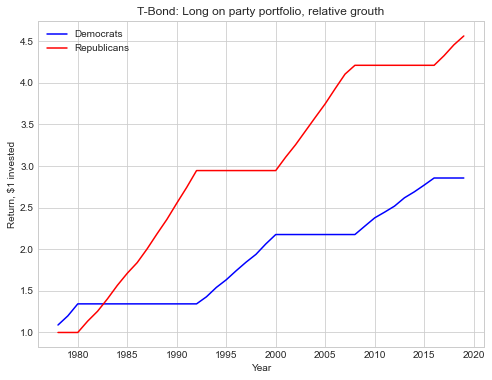

In [446]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Return, $1 invested')
plt.title('T-Bond: Long on party portfolio, relative grouth')
plt.plot(party_sp_tb['dem_tb_portf'], 'b', label='Democrats')
plt.plot(party_sp_tb['rep_tb_portf'], 'r', label='Republicans')
#plt.plot(party_sp_tb['tb_portf'], 'g', label='T-Bonds')
plt.legend()

T-Bond portfolio for Republicans performed better. That means, T_Bonds yield is historically higher when Republicans rule.

### Stocks and T-Bonds Party Timing strategy
For the portfolio of the stocks (`S&P500`) and `T-Bonds`, I backtested the following investment strategies:

* Republican strategy: Stocks for Republican presidents, T-Bonds for Democratic presidents.
* Democratic strategy: Stocks for Democratic presidents, T-Bonds for Republican presidents.

In [461]:
def portf2(df, party):
    portf = []
    for i in df.index:
        if df.loc[i, 'Party'] == party:
            portf.append(df.loc[i, 'ret']) 
        else:
            portf.append(df.loc[i, 'tb'])
    return portf

In [452]:
party_sp_tb['rep_ret'] = portf2(party_sp_tb, 'Republican', 'ret')
party_sp_tb['dem_ret'] = portf2(party_sp_tb, 'Democrat', 'ret')
party_sp_tb['rep_portf'] = (1. + party_sp_tb['rep_ret']).cumprod()
party_sp_tb['dem_portf'] = (1. + party_sp_tb['dem_ret']).cumprod()
party_sp_tb['S&P500'] = (1. + party_sp_tb['ret']).cumprod()
party_sp_tb[['rep_portf', 'dem_portf', 'S&P500']].tail(1)

,rep_portf,dem_portf,S&P500
2019-01-01,9.046164,48.900051,33.972451


In [458]:
print('Stocks&bonds Democrats/Republicans outperformance:', np.round(party_sp_tb.loc[:, 'dem_portf'][-1] /  party_sp_tb.loc[:, 'rep_portf'][-1], 2))

Stocks&bonds Democrats/Republicans outperformance: 5.41


In [459]:
print('Stocks&bonds Democrats/S&P500 outperformance:', np.round(party_sp_tb.loc[:, 'dem_portf'][-1] /  party_sp_tb.loc[:, 'S&P500'][-1], 2))

Stocks&bonds Democrats/S&P500 outperformance: 1.44


In [457]:
print('Stocks&bonds Republicans/T-Bonds underformance:', np.round(party_sp_tb.loc[:, 'rep_portf'][-1] /  party_sp_tb.loc[:, 'tb_portf'][-1], 2))

Stocks&bonds Republicans/T-Bonds underformance: 0.69


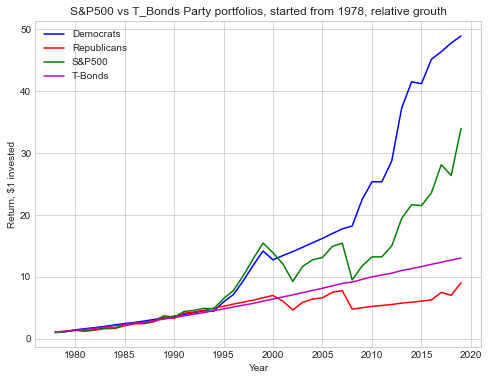

In [460]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Return, $1 invested')
plt.title('S&P500 vs T_Bonds Party portfolios, started from 1978, relative grouth')
plt.plot(party_sp_tb['dem_portf'], 'b', label='Democrats')
plt.plot(party_sp_tb['rep_portf'], 'r', label='Republicans')
plt.plot(party_sp_tb['S&P500'], 'g', label='S&P500')
plt.plot(party_sp_tb['tb_portf'], 'm', label='T-Bonds')
plt.legend()

Starting from 1978, investing in stocks for Republican presidents and T-Bonds for Democratic presidents would turn 1 dollar to 9.05. 
In contrast, investing in stocks for Democrats and T-Bonds for Republicans would turn 1 dollar to 48.90.
**The Democratic stocks&bonds strategy is 5.09 times better than Republican strategy**. The Democratic stocks&bonds strategy **44% outperforms the benchmark `S&P500`**, 
and **the risky Republican stocks&bonds strategy 31% underperforms risk-free T-Bonds**.

In [464]:
print('Stocks Democrats, bonds Republicans strategy:')
print('mean yearly return:', np.round(party_sp_tb['dem_ret'].mean(), 2)) #, party_sp_tb['dem_ret'].std(), party_sp_tb.loc[party_sp_tb['dem_ret'] < 0, 'dem_ret'].std())
print('Sharpe:', np.round(party_sp_tb['dem_ret'].mean()/party_sp_tb['dem_ret'].std(), 2))
print('Sortino:', np.round(party_sp_tb['dem_ret'].mean()/party_sp_tb.loc[party_sp['dem_ret'] < 0, 'dem_ret'].std(), 2))

Stocks Democrats, bonds Republicans strategy:
mean yearly return: 0.1
Sharpe: 1.07
Sortino: 2.13


The Sharpe and Sortino ratios are pretty worthy for such a simple strategy.

Now we see why stock and bonds Democratic portfolio outperforms the opposite Republican portfolio so dramatically:   
* Democrats gain both from better stock market performance when they rule, and higher bonds yield when Republicans rule.   
* Republicans accumulate stock market downtrends during recessions, and have lower bonds yield when Democrats recover the economy after them.

**The winning investment strategy**
* If Biden wins, invest in `S&P500`.
* If Trump wins, invest in `T_Bonds`.   

**Disclaimer**: Backtesting results do not guarantee the future performance.
    
If you think this time is different, read [the book with the same title](https://www.amazon.com/This-Time-Different-Centuries-Financial/dp/0691152640/ref=sr_1_1?crid=EJUNG3O57RFU&dchild=1&keywords=this+time+is+different&qid=1601654601&sprefix=this+time+is%2Caps%2C144&sr=8-1).

As for tax influence on the stock market, I don't have data to calculate tax adjusted returns. Personally, I prefer to pay taxes from high income, 
rather than pay smaller taxes from low income, or position myself a billionaire and pay \\$750 taxes, as Trump.    
By the way, Yann LeCun (Chief AI Scientist at Facebook) [twitted](https://twitter.com/ylecun/status/1310996945045946370): 
"I nominate Donald J. Trump to the Nobel Prize in Economics for figuring out how to spend money like a billionaire while having a negative net worth of minus a few billions. 
I'll nominate him again next year for applying the same method to the US economy".

#### P. S. 
I found a study that confirmed my tests:   
#### [Presidents and the US Economy: An Econometric Exploration](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.20140913), 
By Alan S. Blinder and Mark W. Watson, Prinston University, 2016.   

The US economy has performed better when the president of the
United States is a Democrat rather than a Republican, almost regardless of how one measures performance. For many measures, including real GDP growth (our focus), the performance gap is large and
significant. This paper asks why. The answer is not found in technical
time series matters nor in systematically more expansionary monetary or fiscal policy under Democrats. Rather, it appears that the
Democratic edge stems mainly from more benign oil shocks, superior total factor productivity (TFP) performance, a more favorable
international environment, and perhaps more optimistic consumer
expectations about the near-term future.    

#### P. P. S. Long Stocks for Democrats, Short Stocks for Republicans
If the Republicans collects recessions, is it profitable to short Republicans then? I do not recommend Shorting stocks as an investment, of course. 
It was just to check the box.   
I backtested the following strategy:
* Long stocks for Democratic presidents, short stocks for Republican presidents.

In [468]:
party_sp['long_dem_short_rep_portf'] = (1. + party_sp['dem_ret'] - party_sp['rep_ret']).cumprod()
#party_sp['long_dem_short_rep_portf'] = (1. + party_sp_tb['dem_ret']['1978-01-01':] - party_sp['rep_ret']['1978-01-01':]).cumprod()

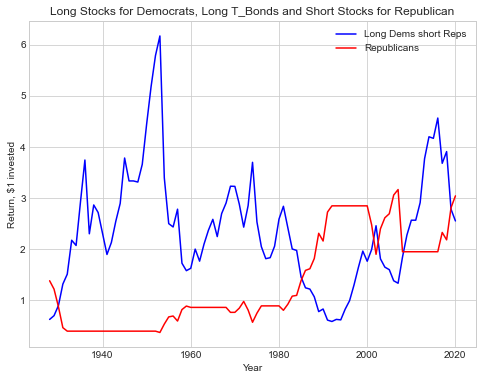

In [469]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Return, $1 invested')
plt.title('Long Stocks for Democrats, Long T_Bonds and Short Stocks for Republican')
plt.plot(party_sp['long_dem_short_rep_portf'], 'b', label='Long Dems short Reps')
#plt.plot(party_sp_tb['rep_portf']['1978-01-01':], 'r', label='Republicans')
plt.plot(party_sp['rep_portf'], 'r', label='Republicans')
plt.legend()

Long for Democrats and Short for republicans strategy is still commparable to long for Republicans and cash for Democrats.

In [ ]:
[The reproducible code](github)